# CÀI ĐẶT

In [24]:
pip install pyvi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# DATA PROCESSING
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import string

# MACHINE LEARNING
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# MAXENT
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

# LSTM
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.models import load_model

# TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pyvi import ViTokenizer
import re
from tensorflow.keras import backend as K

# RESULTS
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil

# OTHER
import requests
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Tải bộ dữ liệu chưa qua xử lý
# !gdown 1wOUJ-oPPstOFk9gcPl4wGvXSPSO2pc_0
data = pd.read_excel("https://raw.githubusercontent.com/janettruong/Vietnamese-News-Classification---NLP-SEM5/main/data/vntoken.xlsx")

# Tải bộ stop word Tiếng Việt
# !gdown 1NHM08W6U9xkf2ajuotD6QWQBBSvp5jj6

In [27]:
data

,URL,Title,Summary,Contents,Date,Author(s),Category,Tags
0,https://laodong.vn/ban-doc/cach-tham-gia-bao-h...,Cách tham gia Bảo hiểm xã hội tự nguyện sau kh...,Bảo hiểm xã hội Việt Nam thông tin về mức đóng...,Bạn đọc hỏi: Tôi mới đi làm và tham gia Bảo hi...,"Thứ tư, 22/09/2021 10:00 (GMT+7)",ANH THƯ,Bạn đọc,"['Bảo hiểm xã hội', 'Bảo hiểm xã hội Việt Nam'..."
1,https://laodong.vn/ban-doc/quang-tri-cay-co-da...,Quảng Trị: Cây cọ dầu ở nơi có dự án của Vingr...,Quảng Trị - Ở địa điểm xây dựng khu đô thị thư...,"Sau khi đấu giá trúng khu đất rộng 132.415,6 m...","Thứ tư, 09/03/2022 18:13 (GMT+7)",HƯNG THƠ,Bạn đọc,"['Quảng Trị', 'Dự án Vingroup ở Quảng Trị', 'V..."
2,https://laodong.vn/ban-doc/lao-cai-dan-khat-nu...,Lào Cai: Dân khát nước bên công trình nước sạc...,Lào Cai – Hàng trăm hộ dân vẫn phải dùng nước ...,"Phản ánh đến PV, người dân xã Cam Đường, TP.Là...","Thứ tư, 11/05/2022 16:57 (GMT+7)",Văn Đức,Bạn đọc,"['Lào Cai', 'Nước sạch', 'nhà máy nước sạch', ..."
3,https://laodong.vn/ban-doc/quy-dinh-ve-viec-la...,Quy định về việc làm giám định sức khoẻ để ngh...,Bạn đọc Hà My hỏi: Tôi có làm giám định sức kh...,"Về vấn đề trên, Bảo hiểm xã hội Việt Nam trả l...","Chủ nhật, 20/06/2021 20:16 (GMT+7)",Minh Hương,Bạn đọc,"['Bảo hiểm xã hội', 'Luật Bảo hiểm xã hội', 'N..."
4,https://laodong.vn/ban-doc/iphone-12-va-dang-c...,iPhone 12 và đẳng cấp “móc túi” người dùng của...,Âm thầm tăng giá bán nhưng lại giảm phụ kiện đ...,"Nếu là iFan, hẳn các bạn còn nhớ, ngày 11.9.20...","Thứ năm, 15/10/2020 06:58 (GMT+7)",Đạt Phan,Bạn đọc,"['Bảo vệ môi trường', 'Apple', 'Iphone', 'Appl..."
...,...,...,...,...,...,...,...,...
38995,https://laodong.vn/moi-truong/nam-bo-nang-nong...,"Nam Bộ nắng nóng diện rộng, chỉ số UV báo động đỏ","Trong ngày 7.3, TPHCM và các tỉnh, thành lân c...",Thông tin từ Đài Khí tượng thủy văn khu vực Na...,"Chủ nhật, 07/03/2021 16:00 (GMT+7)",Hạ Mây,Xã hội,"['Dự báo thời tiết', 'Thời tiết TPHCM', 'Thời ..."
38996,https://laodong.vn/xa-hoi/du-bao-thoi-tiet-281...,Dự báo thời tiết 28.11: Nhiệt độ vọt tăng 3 độ...,"Từ ngày 28.11, nhiệt độ tại Bắc Bộ và Trung Bộ...",Từ bản tin Dự báo thời tiết của Trung tâm Dự b...,"Thứ ba, 28/11/2017 06:30 (GMT+7)",Kh.V,Xã hội,"['Hà Nội', 'Dự báo thời tiết', 'Nhiệt độ', 'Th..."
38997,https://laodong.vn/xa-hoi/dich-covid-19-cac-ki...,Dịch COVID-19: Các kịch bản dự báo thị trường ...,"Trước diễn biến của dịch COVID-19, Bộ Lao động...","Nhu cầu tuyển dụng giảm Bộ Lao động, Thương bi...","Thứ sáu, 03/04/2020 11:00 (GMT+7)",Quỳnh Chi,Xã hội,['Dịch COVID-19']
38998,https://laodong.vn/xa-hoi/xac-minh-mot-fanpage...,Xác minh một fanpage tung tin thất thiệt Trấn ...,"Cà Mau - Chiều ngày 24.3, lãnh đạo Sở Thông ti...",Lãnh đạo Sở Thông tin và Truyền thông tỉnh Cà ...,"Thứ năm, 24/03/2022 16:47 (GMT+7)",NHẬT HỒ,Xã hội,"['Cà Mau', 'Mạng xã hội', 'Trấn Thành']"


# TIỀN XỬ LÝ

In [28]:
# Kiểm tra các giá trị trùng lặp và các dòng bị thiếu dữ liệu
print('Giá trị trùng lặp:',data.duplicated().sum())
print("\nGiá trị bị thiếu:")
data.isnull().sum()

Giá trị trùng lặp: 20687

Giá trị bị thiếu:


URL             0
Title           0
Summary       587
Contents     2039
Date            0
Author(s)     766
Category        0
Tags            0
dtype: int64

In [29]:
# Xoá các dòng chứa giá trị trùng lặp và các dòng bị thiếu dữ liệu
data.drop_duplicates(inplace = True)
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

In [30]:
print('\nSố lượng bài viết của từng thể loại:')
category_counts = data['Category'].value_counts()
category_counts


Số lượng bài viết của từng thể loại:


Category
Pháp luật                     985
Thế giới                      975
Kinh doanh                    966
Thể thao                      965
Xã hội                        964
Sức khỏe                      952
Công đoàn                     951
Thời sự                       948
Giáo dục                      945
Văn hóa - Giải trí            941
Media                         921
Bạn đọc                       920
Gia đình - Hôn nhân           873
Bất động sản                  869
Xe +                          826
Tấm Lòng Vàng                 727
Công nghệ                     582
Lao Động cuối tuần            495
Lưu trữ                       379
Lao Động & Đời sống           319
Diễn đàn                      278
Tin hoạt động                 216
Tin tức việc làm              166
Thông tin tiện ích             96
Sự kiện Bình luận              58
Phóng sự                       47
Tin địa phương                 31
Quỹ TLV                        28
Thông tin doanh nghiệp         15
Tin b

In [31]:
category_mapping = {
    'Lao Động Xuân': 'Lao Động & Đời sống',
    'Video': 'Media',
    'Tản mạn - Chuyện dọc đường': 'Bạn đọc',
    'Phóng sự - Điều tra': 'Thời sự',
    'Thông tin doanh nghiệp': 'Kinh doanh',
    'Lao Động cuối tuần': 'Lao Động & Đời sống',
    'Người Việt tử tế': 'Tấm Lòng Vàng',
    'Sổ tay kinh tế': 'Kinh doanh',
    'Quỹ TLV': 'Tấm Lòng Vàng',
    'Tin địa phương': 'Thời sự',
    'Du lịch': 'Văn hóa - Giải trí',
    'Phóng sự': 'Thời sự'
}


# Áp dụng việc thay đổi nhãn
data['Category'] = data['Category'].replace(category_mapping)
data['Category'].value_counts()

Category
Thời sự                1028
Kinh doanh              988
Pháp luật               985
Thế giới                975
Thể thao                965
Xã hội                  964
Sức khỏe                952
Văn hóa - Giải trí      952
Công đoàn               951
Giáo dục                945
Media                   922
Bạn đọc                 921
Gia đình - Hôn nhân     873
Bất động sản            869
Xe +                    826
Lao Động & Đời sống     815
Tấm Lòng Vàng           757
Công nghệ               582
Lưu trữ                 379
Diễn đàn                278
Tin hoạt động           216
Tin tức việc làm        166
Thông tin tiện ích       96
Sự kiện Bình luận        58
Tin bài xem thêm         13
Tin bài liên quan         1
Tin bài nổi bật           1
Name: count, dtype: int64

In [32]:
data.drop(data[data['Category'] == 'Lưu trữ'].index,inplace= True)
data.drop(data[data['Category'] == 'Tin hoạt động'].index,inplace= True)
data.drop(data[data['Category'] == 'Diễn đàn'].index,inplace= True)
data.drop(data[data['Category'] == 'Sự kiện Bình luận'].index,inplace= True)
data.drop(data[data['Category'].isin(['Tin bài nổi bật','Tin bài liên quan','Tin bài xem thêm','Lao Động & Đời sống','Bạn đọc','Media','Công đoàn','Xã hội','Kinh doanh','Thời sự'])].index,inplace= True)
data.reset_index(drop = True, inplace = True)

In [33]:
num_categories = data['Category'].nunique()
print(f'Số lượng thể loại có trong bộ dữ liệu: {num_categories}')
print('Số lượng bài viết của từng thể loại:')
data['Category'].value_counts()

Số lượng thể loại có trong bộ dữ liệu: 13
Số lượng bài viết của từng thể loại:


Category
Pháp luật              985
Thế giới               975
Thể thao               965
Văn hóa - Giải trí     952
Sức khỏe               952
Giáo dục               945
Gia đình - Hôn nhân    873
Bất động sản           869
Xe +                   826
Tấm Lòng Vàng          757
Công nghệ              582
Tin tức việc làm       166
Thông tin tiện ích      96
Name: count, dtype: int64

In [34]:
data = data[['Category','Summary']]
data

,Category,Summary
0,Bất động sản,"Bước sang quý III.2019, giao dịch bất động sản..."
1,Bất động sản,Tin tưởng vào việc hùn vốn với giám đốc công t...
2,Bất động sản,Chủ tịch UBND tỉnh Bắc Ninh vừa phê duyệt quy ...
3,Bất động sản,Chuyển đổi quyền sử dụng đất (đổi đất) chỉ áp ...
4,Bất động sản,Không ai phủ nhận ý nghĩa của Đề án giãn dân p...
...,...,...
9938,Xe +,"Mới đây, trên mạng xã hội giao thông đăng tải ..."
9939,Xe +,"Theo thống kê của Uỷ ban ATGT Quốc gia, trong ..."
9940,Xe +,Ca sĩ Lily Chen tậu xe Mercedes G63 AMG có giá...
9941,Xe +,"Xe máy sau một thời gian vận hành, một số bộ p..."


In [35]:
def text_preprocessing(sent):
    sent = str(sent)

    # Download the Vietnamese stop words file from GitHub
    stop_words_url = 'https://raw.githubusercontent.com/janettruong/Vietnamese-News-Classification---NLP-SEM5/main/data/vietnamese.txt'
    stop_words_response = requests.get(stop_words_url)
    stop_words = stop_words_response.text.split('\n')

    sent = re.sub(f'[{string.punctuation}\d\n]', '', sent)
    sent = re.sub(r'[^\w\s]', '', sent)
    sent = ViTokenizer.tokenize(sent.lower())
    sent = [w for w in sent.split()]
    sent = [w for w in sent if w not in stop_words]
    return ' '.join(sent)


In [36]:
data['tokenized_contents'] = data['Summary'].apply(lambda x: text_preprocessing(x))
data

,Category,Summary,tokenized_contents
0,Bất động sản,"Bước sang quý III.2019, giao dịch bất động sản...",quý iii giao_dịch bất_động_sản thị_trường đà_n...
1,Bất động sản,Tin tưởng vào việc hùn vốn với giám đốc công t...,tin_tưởng hùn vốn giám_đốc công_ty bất_động_sả...
2,Bất động sản,Chủ tịch UBND tỉnh Bắc Ninh vừa phê duyệt quy ...,chủ_tịch ubnd tỉnh bắc ninh phê_duyệt quy_hoạc...
3,Bất động sản,Chuyển đổi quyền sử dụng đất (đổi đất) chỉ áp ...,chuyển_đổi quyền sử_dụng đất đổi đất áp_dụng đ...
4,Bất động sản,Không ai phủ nhận ý nghĩa của Đề án giãn dân p...,phủ_nhận ý_nghĩa đề_án giãn dân_phố cổ hà_nội ...
...,...,...,...
9938,Xe +,"Mới đây, trên mạng xã hội giao thông đăng tải ...",mới_đây mạng xã_hội giao_thông đăng_tải clip b...
9939,Xe +,"Theo thống kê của Uỷ ban ATGT Quốc gia, trong ...",thống_kê uỷ_ban atgt quốc_gia đầu toàn_quốc xả...
9940,Xe +,Ca sĩ Lily Chen tậu xe Mercedes G63 AMG có giá...,ca_sĩ lily chen tậu xe mercedes g amg có_giá l...
9941,Xe +,"Xe máy sau một thời gian vận hành, một số bộ p...",xe_máy thời_gian vận_hành một_số bộ_phận rơ rã...


# HYPERPARAMETER TUNING

## 1. HỌC MÁY

In [37]:
# Chia dữ liệu thành 80% train và 20% test
X_train = data['tokenized_contents']
y_train = data['Category']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [38]:
# Một số mô hình cần vectorize dữ liệu văn bản
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

### SVC

In [39]:
# Thiết lập grid của tham số
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly','sigmoid']
}

# Tạo mô hình và Grid Search
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [40]:
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)
best_model = grid_search_svm.best_estimator_
y_val_pred = best_model.predict(X_val_tfidf)

# Đánh giá mô hình
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='macro')
recall_val = recall_score(y_val, y_val_pred, average='macro')
f1_val = f1_score(y_val, y_val_pred, average='macro')

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1-Score:", f1_val)

{'C': 1, 'kernel': 'linear'}
0.849382651629251
Validation Accuracy: 0.8562091503267973
Validation Precision: 0.8670965662527367
Validation Recall: 0.8447173286460361
Validation F1-Score: 0.8543050612777129


### GaussianNB

In [41]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Tạo mô hình và Grid Search
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)
grid_search_nb.fit(X_train_tfidf, y_train)

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HONG MAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HONG MAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HONG MAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py", line 263, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\HONG MAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py", line 423, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HONG MAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HONG MAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\HONG MAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 881, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HONG MAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 532, in _ensure_sparse_format
    raise TypeError(
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


In [ ]:
print(grid_search_nb.best_params_)
print(grid_search_nb.best_score_)
best_model_nb = grid_search_nb.best_estimator_
y_val_pred = best_model_nb.predict(X_val_tfidf)

# Đánh giá mô hình
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='macro')
recall_val = recall_score(y_val, y_val_pred, average='macro')
f1_val = f1_score(y_val, y_val_pred, average='macro')

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1-Score:", f1_val)

### Decision Tree

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Tiêu chuẩn chia tách
    'max_depth': [10, 20, 30],         # Độ sâu tối đa của cây
    'min_samples_split': [2, 4, 6],    # Số lượng mẫu tối thiểu để tách một nút
    'min_samples_leaf': [1, 2, 4]      # Số lượng mẫu tối thiểu ở mỗi lá cây
}

# Tạo đối tượng GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train_tfidf, y_train)

In [ ]:
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)
best_model_dt = grid_search_dt.best_estimator_
y_val_pred = best_model_dt.predict(X_val_tfidf)

# Đánh giá mô hình
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='macro')
recall_val = recall_score(y_val, y_val_pred, average='macro')
f1_val = f1_score(y_val, y_val_pred, average='macro')

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1-Score:", f1_val)

### Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Số lượng cây
    'max_depth': [10, 20, 30],       # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 4, 6],  # Số lượng mẫu tối thiểu để tách một nút
    'min_samples_leaf': [1, 2, 4]    # Số lượng mẫu tối thiểu ở mỗi lá cây
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Huấn luyện sử dụng Grid Search
grid_search.fit(X_train_tfidf, y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_tfidf)

# Đánh giá mô hình
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='macro')
recall_val = recall_score(y_val, y_val_pred, average='macro')
f1_val = f1_score(y_val, y_val_pred, average='macro')

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1-Score:", f1_val)

## 2. MAXENT

### L1 & L2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, precision_score, classification_report

class MaxEntClassifier:
    def __init__(self):
        self.model = None
        self.vectorizer = DictVectorizer()

    def train(self, X_train, y_train, hyperparameter_grid=None):
        X_train = [self._extract_features(x) for x in X_train]
        X_train = self.vectorizer.fit_transform(X_train)

        # Hyperparameter Grid
        if hyperparameter_grid is None:
            hyperparameter_grid = {
                'C': [0.1, 1.0, 10.0],
                # Còn một loại penalty đó nữa là elastic net, nhưng sẽ code thủ công vì phải set l1_ratio
                'penalty': ['l1', 'l2'],
                'solver': ['lbfgs', 'liblinear']
            }

        logistic_regression = LogisticRegression(multi_class='auto')
        grid_search = GridSearchCV(logistic_regression, hyperparameter_grid, cv=3, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # In kết quả cho mỗi lần chạy
        results_df = pd.DataFrame(grid_search.cv_results_)
        print("Results for Each Hyperparameter Combination:")
        print(results_df[['mean_fit_time','params', 'mean_test_score', 'std_test_score']])

        self.model = grid_search.best_estimator_

    def predict(self, X_test):
        X_test = [self._extract_features(x) for x in X_test]
        X_test = self.vectorizer.transform(X_test)
        return self.model.predict(X_test)

    def evaluate(self, X, y, set_name):
        X = [self._extract_features(x) for x in X]
        X = self.vectorizer.transform(X)
        predictions = self.model.predict(X)

        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions, average='weighted')

        print(f"{set_name} Set Metrics:")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Classification Report:")
        print(classification_report(y, predictions))

    def _extract_features(self, sentence):
        features = {}
        for i, token in enumerate(sentence.split()):
            features[f'word_{i}'] = token
        return features

# Tạo classifier
maxent_classifier = MaxEntClassifier()

# Train với hyperparameter tuning
hyperparameter_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

maxent_classifier.train(X_train, y_train, hyperparameter_grid=hyperparameter_grid)

# In parameter tốt nhất
best_params = maxent_classifier.model.get_params()
print("Best Hyperparameters:", best_params)

# Đánh giá trên tập train
maxent_classifier.evaluate(X_train, y_train, set_name='Training')

# Đánh giá trên tập test
maxent_classifier.evaluate(X_val, y_val, set_name='Validation')

### L1 + L2

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, precision_score, classification_report

class MaxEntClassifier:
    def __init__(self):
        self.model = None
        self.vectorizer = DictVectorizer()

    def train(self, X_train, y_train, hyperparameter_grid=None):
        X_train = [self._extract_features(x) for x in X_train]
        X_train = self.vectorizer.fit_transform(X_train)

        # Hyperparameter Grid
        if hyperparameter_grid is None:
            hyperparameter_grid = {
                'C': [0.1, 1.0, 10.0],
                'solver': ['saga']
            }

        # Using elastic net penalty with l1_ratio=0.5
        logistic_regression = LogisticRegression(multi_class='auto', penalty='elasticnet', l1_ratio=0.5)
        grid_search = GridSearchCV(logistic_regression, hyperparameter_grid, cv=3, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # In kết quả cho mỗi lần chạy
        results_df = pd.DataFrame(grid_search.cv_results_)
        print("Results for Each Hyperparameter Combination:")
        print(results_df[['mean_fit_time','params', 'mean_test_score', 'std_test_score']])

        self.model = grid_search.best_estimator_

    def predict(self, X_test):
        X_test = [self._extract_features(x) for x in X_test]
        X_test = self.vectorizer.transform(X_test)
        return self.model.predict(X_test)

    def evaluate(self, X, y, set_name):
        X = [self._extract_features(x) for x in X]
        X = self.vectorizer.transform(X)
        predictions = self.model.predict(X)

        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions, average='weighted')

        print(f"{set_name} Set Metrics:")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Classification Report:")
        print(classification_report(y, predictions))

    def _extract_features(self, sentence):
        features = {}
        for i, token in enumerate(sentence.split()):
            features[f'word_{i}'] = token
        return features

# Chia thành target và dependent
X_train = maxent_train_data['tokenized_contents'].tolist()
y_train = maxent_train_data['Category'].tolist()
X_val = maxent_val_data['tokenized_contents'].tolist()
y_val = maxent_val_data['Category'].tolist()

# Tạo classifier
maxent_classifier = MaxEntClassifier()

# Train với hyperparameter tuning
hyperparameter_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['saga']
}

maxent_classifier.train(X_train, y_train, hyperparameter_grid=hyperparameter_grid)

# In parameter tốt nhất
best_params = maxent_classifier.model.get_params()
print("Best Hyperparameters:", best_params)

# Đánh giá trên tập train
maxent_classifier.evaluate(X_train, y_train, set_name='Training')

# Đánh giá trên tập test
maxent_classifier.evaluate(X_val, y_val, set_name='Validation')

## 3. HỌC SÂU

In [ ]:
# BỔ SUNG TIỀN XỬ LÝ

# Chia thành cột tokenized_contents và cột Category
sentences = data['tokenized_contents'].tolist()
labels = data['Category'].tolist()

# Sử dụng LabelEncoder để mã hóa nhãn
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_encoded

# Xử lý dữ liệu văn bản
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
sequences = tokenizer.texts_to_sequences(sentences)
sequences[:1]

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(sequences, labels_encoded, test_size=0.2, random_state=42)

# Xử lý dữ liệu đầu vào
max_length = max(len(seq) for seq in sequences)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
# ĐỊNH NGHĨA LỚP ATTENTION
class Attention(tf.keras.layers.Layer):
    def __init__(self, return_sequences=False):
        self.return_sequences = return_sequences
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")

        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)

        if self.return_sequences:
            return a * x
        else:
            return K.sum(a * x, axis=1)

In [ ]:
# THỰC HIỆN GRID SEARCH

# Chuẩn bị nhãn & Mô hình
num_classes = len(label_encoder.classes_)
one_hot_labels_train = to_categorical(y_train, num_classes=num_classes)
one_hot_labels_test = to_categorical(y_test, num_classes=num_classes)

# Chọn các siêu tham số sử dụng
lstm_units_list = [64, 128, 256]
optimizers_list = [Adam(), RMSprop(), SGD()]
embedding_dim = 100
epochs = 5

# Lặp qua các tổ hợp siêu tham số
for lstm_units in lstm_units_list:
    for optimizer in optimizers_list:
        print(f"\nTesting with LSTM units: {lstm_units}, Optimizer: {optimizer.__class__.__name__}")

        # Tạo mô hình
        model = Sequential()
        model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
        model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
        model.add(Attention())
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Train the model
        start_time = time.time()
        usemodel = model.fit(X_train, one_hot_labels_train, batch_size=32, epochs=5, validation_data=(X_test, one_hot_labels_test), verbose=0)
        end_time = time.time()
        total_training_time = end_time - start_time
        mean_fit_time_per_epoch = total_training_time / len(usemodel.history['loss'])

        # Display results
        print(f"Mean Fit Time per Epoch: {mean_fit_time_per_epoch:.4f}")

        # Display loss and accuracy for each epoch
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            print(f"  Train Loss: {usemodel.history['loss'][epoch]:.4f} - Train Accuracy: {usemodel.history['accuracy'][epoch]:.4f}")
            print(f"  Val Loss: {usemodel.history['val_loss'][epoch]:.4f} - Val Accuracy: {usemodel.history['val_accuracy'][epoch]:.4f}")

        # Calculate and display mean values
        mean_train_loss = np.mean(usemodel.history['loss'])
        mean_train_accuracy = np.mean(usemodel.history['accuracy'])
        mean_val_loss = np.mean(usemodel.history['val_loss'])
        mean_val_accuracy = np.mean(usemodel.history['val_accuracy'])

        print(f"Mean Train Loss: {mean_train_loss:.4f} - Mean Train Accuracy: {mean_train_accuracy:.4f}")
        print(f"Mean Val Loss: {mean_val_loss:.4f} - Mean Val Accuracy: {mean_val_accuracy:.4f}")


# XÂY DỰNG MÔ HÌNH CUỐI

## 1. HỌC MÁY

### SVC

In [ ]:
# SVC
svc = SVC(C=10, kernel='linear')

# MEASURE MEMORY USAGE BEFORE TRAINING
start_memory = psutil.virtual_memory().used

# FIT MODEL
start_time = time.time()
svc.fit(X_train_tfidf, y_train)
end_time = time.time()

# MEASURE MEMORY USAGE AFTER TRAINING
end_memory = psutil.virtual_memory().used

# Calculate training time, memory usage, and accuracy
svc_time_trained = end_time - start_time
svc_memory_used = end_memory - start_memory

# Predict and evaluate on training set
y_train_pred = svc.predict(X_train_tfidf)
svc_accuracy_train = accuracy_score(y_train, y_train_pred)

# Predict and evaluate on validation set
y_val_pred = svc.predict(X_val_tfidf)
svc_accuracy_val = accuracy_score(y_val, y_val_pred)

# Store results in separate variables
svc_accuracy = {'train': svc_accuracy_train, 'val': svc_accuracy_val}

### GaussianNB

In [ ]:
nb_X_train = X_train_tfidf.toarray()
nb_X_val = X_val_tfidf.toarray()

# Gaussian Naive Bayes
gaussian_nb = GaussianNB(var_smoothing=1e-09)

# MEASURE MEMORY USAGE BEFORE TRAINING
start_memory = psutil.virtual_memory().used

# FIT MODEL
start_time = time.time()
gaussian_nb.fit(nb_X_train, y_train)
end_time = time.time()

# MEASURE MEMORY USAGE AFTER TRAINING
end_memory = psutil.virtual_memory().used

# Calculate training time, memory usage, and accuracy
gaussian_nb_time_trained = end_time - start_time
gaussian_nb_memory_used = end_memory - start_memory

# Predict and evaluate on training set
y_train_pred = gaussian_nb.predict(nb_X_train)
gaussian_nb_accuracy_train = accuracy_score(y_train, y_train_pred)

# Predict and evaluate on validation set
y_val_pred = gaussian_nb.predict(nb_X_val)
gaussian_nb_accuracy_val = accuracy_score(y_val, y_val_pred)

# Store results in separate variables
gaussian_nb_accuracy = {'train': gaussian_nb_accuracy_train, 'val': gaussian_nb_accuracy_val}

### DECISION TREE

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=4, min_samples_split=2)

# MEASURE MEMORY USAGE BEFORE TRAINING
start_memory = psutil.virtual_memory().used

# FIT MODEL
start_time = time.time()
decision_tree.fit(X_train_tfidf, y_train)
end_time = time.time()

# MEASURE MEMORY USAGE AFTER TRAINING
end_memory = psutil.virtual_memory().used

# Calculate training time, memory usage, and accuracy
decision_tree_time_trained = end_time - start_time
decision_tree_memory_used = end_memory - start_memory

# Predict and evaluate on training set
y_train_pred = decision_tree.predict(X_train_tfidf)
decision_tree_accuracy_train = accuracy_score(y_train, y_train_pred)

# Predict and evaluate on validation set
y_val_pred = decision_tree.predict(X_val_tfidf)
decision_tree_accuracy_val = accuracy_score(y_val, y_val_pred)

# Store results in separate variables
decision_tree_accuracy = {'train': decision_tree_accuracy_train, 'val': decision_tree_accuracy_val}

### RANDOM FOREST

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=150)

# MEASURE MEMORY USAGE BEFORE TRAINING
start_memory = psutil.virtual_memory().used

# FIT MODEL
start_time = time.time()
random_forest.fit(X_train_tfidf, y_train)
end_time = time.time()

# MEASURE MEMORY USAGE AFTER TRAINING
end_memory = psutil.virtual_memory().used

# Calculate training time, memory usage, and accuracy
random_forest_time_trained = end_time - start_time
random_forest_memory_used = end_memory - start_memory

# Predict and evaluate on training set
y_train_pred = random_forest.predict(X_train_tfidf)
random_forest_accuracy_train = accuracy_score(y_train, y_train_pred)

# Predict and evaluate on validation set
y_val_pred = random_forest.predict(X_val_tfidf)
random_forest_accuracy_val = accuracy_score(y_val, y_val_pred)

# Store results in separate variables
random_forest_accuracy = {'train': random_forest_accuracy_train, 'val': random_forest_accuracy_val}

## 2. MAXENT CLASSIFIER

In [ ]:
class MaxEntClassifier:
    def __init__(self):
        self.model = None
        self.vectorizer = DictVectorizer()

    def train(self, X_train, y_train):
        X_train = [self._extract_features(x) for x in X_train]
        X_train = self.vectorizer.fit_transform(X_train)
        self.model = LogisticRegression(C=10.0, penalty='l2', solver='liblinear')
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        X_test = [self._extract_features(x) for x in X_test]
        X_test = self.vectorizer.transform(X_test)
        return self.model.predict(X_test)

    def evaluate(self, X, y, set_name):
        X = [self._extract_features(x) for x in X]
        X = self.vectorizer.transform(X)
        predictions = self.model.predict(X)

        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions, average='weighted')

        print(f"{set_name} Set Metrics:")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Classification Report:")
        print(classification_report(y, predictions))

    def _extract_features(self, sentence):
        features = {}
        for i, token in enumerate(sentence.split()):
            features[f'word_{i}'] = token
        return features


# MAXENT
maxent_classifier = MaxEntClassifier()

# MEASURE MEMORY USAGE BEFORE TRAINING
start_memory = psutil.virtual_memory().used

# FIT MODEL
start_time = time.time()
maxent_classifier.train(X_train, y_train)
end_time = time.time()

# MEASURE MEMORY USAGE AFTER TRAINING
end_memory = psutil.virtual_memory().used

# Calculate training time and memory usage
maxent_time_trained = end_time - start_time
maxent_memory_used = end_memory - start_memory

# Evaluate on the validation set and capture accuracy
maxent_accuracy_val = maxent_classifier.evaluate(X_val, y_val, set_name='Validation')

Validation Set Metrics:
Accuracy: 0.7320261437908496
Precision: 0.7434648558094213
Classification Report:
                     precision    recall  f1-score   support

       Bất động sản       0.80      0.75      0.77       185
          Công nghệ       0.75      0.56      0.64       116
Gia đình - Hôn nhân       0.58      0.67      0.63       180
           Giáo dục       0.82      0.84      0.83       187
          Pháp luật       0.77      0.75      0.76       194
           Sức khỏe       0.68      0.69      0.68       194
 Thông tin tiện ích       1.00      0.71      0.83        21
           Thế giới       0.62      0.85      0.72       183
           Thể thao       0.85      0.89      0.87       187
   Tin tức việc làm       0.87      0.34      0.49        38
      Tấm Lòng Vàng       0.89      0.69      0.78       156
 Văn hóa - Giải trí       0.62      0.64      0.63       196
               Xe +       0.77      0.74      0.75       152

           accuracy                   

In [ ]:
# Predict on validation set
y_val_pred = maxent_classifier.predict(X_val)

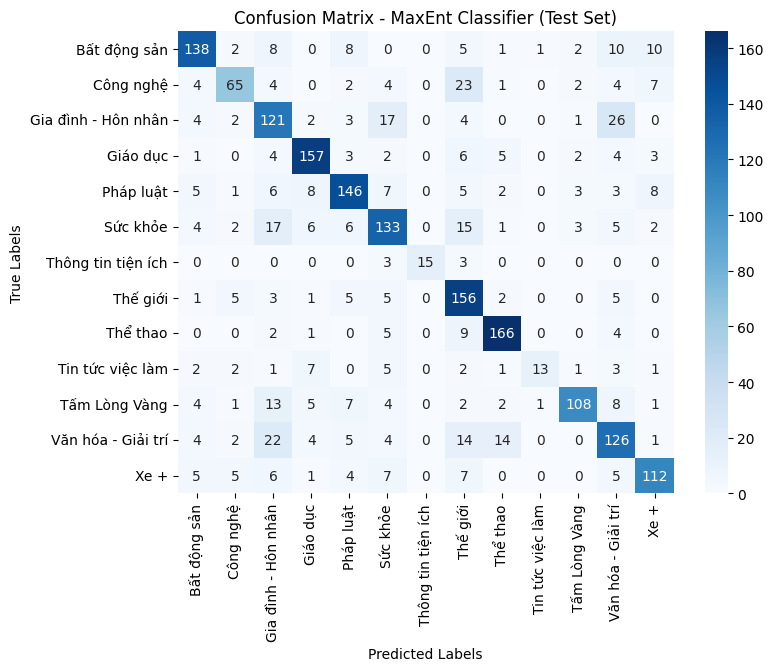

Test Set Metrics:
Accuracy: 0.7320261437908496
Precision: 0.7434648558094213
Classification Report:
                     precision    recall  f1-score   support

       Bất động sản       0.80      0.75      0.77       185
          Công nghệ       0.75      0.56      0.64       116
Gia đình - Hôn nhân       0.58      0.67      0.63       180
           Giáo dục       0.82      0.84      0.83       187
          Pháp luật       0.77      0.75      0.76       194
           Sức khỏe       0.68      0.69      0.68       194
 Thông tin tiện ích       1.00      0.71      0.83        21
           Thế giới       0.62      0.85      0.72       183
           Thể thao       0.85      0.89      0.87       187
   Tin tức việc làm       0.87      0.34      0.49        38
      Tấm Lòng Vàng       0.89      0.69      0.78       156
 Văn hóa - Giải trí       0.62      0.64      0.63       196
               Xe +       0.77      0.74      0.75       152

           accuracy                         

In [ ]:
# Draw Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=maxent_classifier.model.classes_,
            yticklabels=maxent_classifier.model.classes_)
plt.title('Confusion Matrix - MaxEnt Classifier (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print Classification Report
maxent_classifier.evaluate(X_val, y_val, set_name='Test')

In [ ]:
maxent_accuracy_val = 0.7320261437908496

## 3. HỌC SÂU - LSTM

In [ ]:
# SPLIT DATA
lstm_train_data = data
sentences = lstm_train_data['tokenized_contents'].tolist()
labels = lstm_train_data['Category'].tolist()

# ENCODE DATA
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_encoded

# CHANGE TO SEQUENCE
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
sequences = tokenizer.texts_to_sequences(sentences)
sequences[:1]

# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(sequences, labels_encoded, test_size=0.2, random_state=42)

# GET MAX_LENGTH
max_length = max(len(seq) for seq in sequences)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
X_train

array([[   0,    0,    0, ...,  201,    8,    4],
       [   0,    0,    0, ...,  996,  708,  340],
       [   0,    0,    0, ..., 1102,  481,    5],
       ...,
       [   0,    0,    0, ..., 6316, 6317, 6318],
       [   0,    0,    0, ...,  150,  928,   39],
       [   0,    0,    0, ...,  159, 2924, 3395]], dtype=int32)

In [ ]:
# DEFINE ATTENTION CLASS
class Attention(tf.keras.layers.Layer):
    def __init__(self, return_sequences=False):
        self.return_sequences = return_sequences
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")

        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)

        if self.return_sequences:
            return a * x
        else:
            return K.sum(a * x, axis=1)

In [ ]:
# PREPARE LABELS
num_classes = len(label_encoder.classes_)
one_hot_labels_train = to_categorical(y_train, num_classes=num_classes)
one_hot_labels_test = to_categorical(y_test, num_classes=num_classes)

# CREATE MODEL
embedding_dim = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Attention())
model.add(Dense(num_classes, activation='softmax'))

# COMPILE MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# COMPILE MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# MEASURE MEMORY USAGE BEFORE TRAINING
start_memory = psutil.virtual_memory().used

# FIT MODEL
start_time = time.time()
history = model.fit(X_train, one_hot_labels_train, batch_size=32, epochs=5, validation_data=(X_test, one_hot_labels_test), verbose=0)
end_time = time.time()

# MEASURE MEMORY USAGE AFTER TRAINING
end_memory = psutil.virtual_memory().used

# CALCULATE METRICS
total_training_time = end_time - start_time
mean_fit_time_per_epoch = total_training_time / len(history.history['loss'])
memory_used = end_memory - start_memory
mean_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

In [ ]:
# RENAMED FOR BETTER ORGANIZATION
lstm_time_trained = mean_fit_time_per_epoch
lstm_memory_used = memory_used
lstm_accuracy_val = mean_accuracy

# GRAPHING

In [ ]:
model_names = ['SVC', 'GaussianNB', 'DecisionTree', 'RandomForest', 'MaxentClassifier','LSTM']
time_trained_values = [svc_time_trained, gaussian_nb_time_trained, decision_tree_time_trained, random_forest_time_trained, maxent_time_trained,lstm_time_trained]
memory_used_values = [svc_memory_used, gaussian_nb_memory_used, decision_tree_memory_used, random_forest_memory_used, maxent_memory_used,lstm_memory_used]

## Accuracy

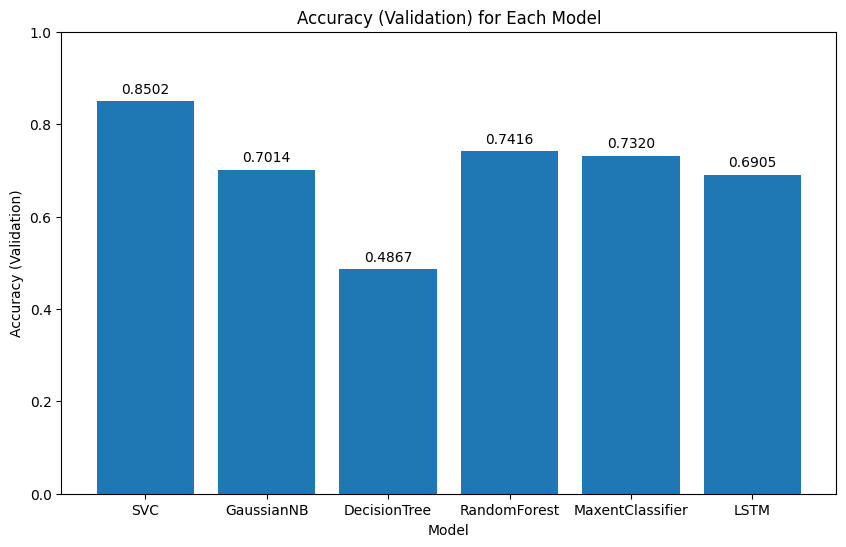

In [ ]:
model_names = ['SVC', 'GaussianNB', 'DecisionTree', 'RandomForest', 'MaxentClassifier','LSTM']
accuracy_val_values = [svc_accuracy_val, gaussian_nb_accuracy_val, decision_tree_accuracy_val, random_forest_accuracy_val, maxent_accuracy_val,lstm_accuracy_val]

# Plot bar graph for accuracy (validation)
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_val_values)

# Add labels for specific values on top of each bar with a small space
for bar, value in zip(bars, accuracy_val_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * max(accuracy_val_values), f'{value:.4f}', ha='center', color='black', fontsize=10)

plt.title('Accuracy (Validation) for Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy (Validation)')
plt.ylim(0, 1)  # Set y-axis limit to ensure accuracy values are between 0 and 1
plt.show()

## Memory Used

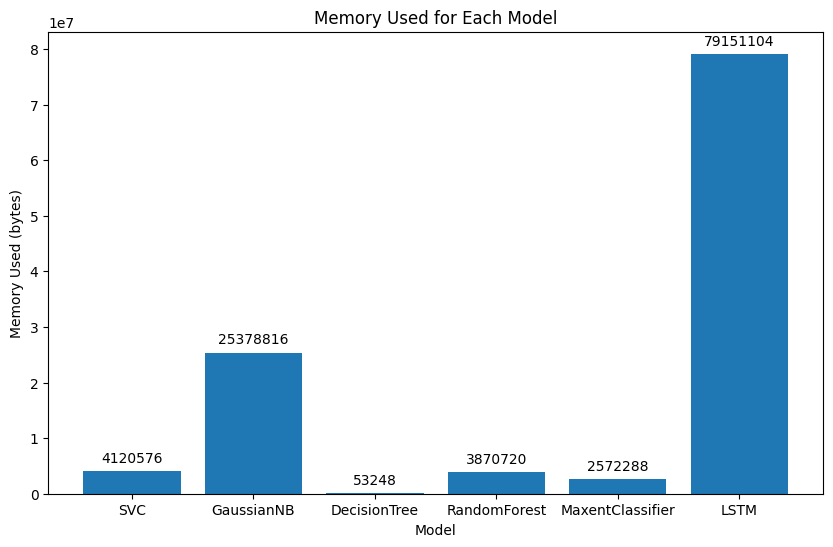

In [ ]:
# Plot bar graph for memory used
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, memory_used_values)

# Add labels for specific values on top of each bar with a small space
for bar, value in zip(bars, memory_used_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * max(memory_used_values), f'{value}', ha='center', color='black', fontsize=10)

plt.title('Memory Used for Each Model')
plt.xlabel('Model')
plt.ylabel('Memory Used (bytes)')
plt.show()

## Time Trained

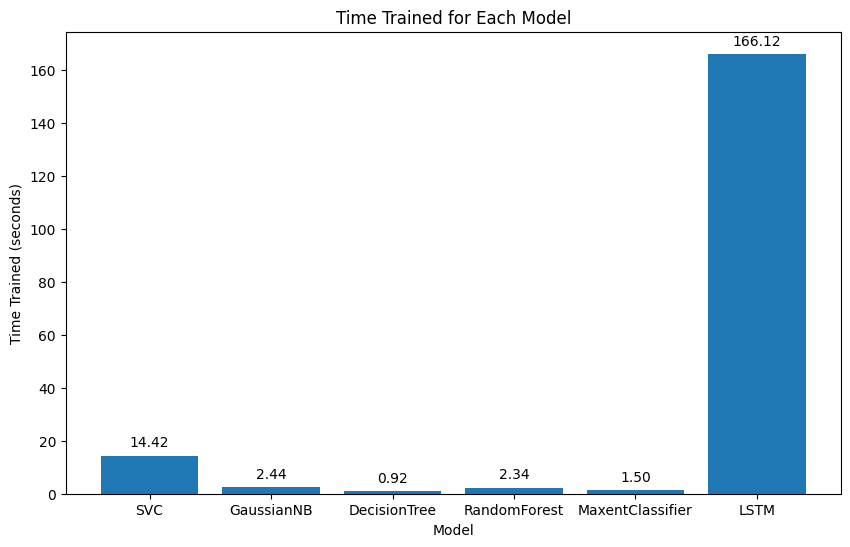

In [ ]:
# Plot bar graph for time trained
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, time_trained_values)

# Add labels for specific values on top of each bar with a small space
for bar, value in zip(bars, time_trained_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * max(time_trained_values), f'{value:.2f}', ha='center', color='black', fontsize=10)

plt.title('Time Trained for Each Model')
plt.xlabel('Model')
plt.ylabel('Time Trained (seconds)')
plt.show()